In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import math

def img_show(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure("Image") # 图像窗口名称
    plt.imshow(img_rgb)
    plt.axis('off') # 关掉坐标轴为 off
    plt.show()

bull_color_dist = {'red': {'Lower': np.array([0, 35, 32]), 'Upper': np.array([17, 255, 255])},          
              'blue': {'Lower': np.array([95, 28, 35]), 'Upper': np.array([115, 255, 255])},
              'green': {'Lower': np.array([42, 35, 38]), 'Upper': np.array([80, 255, 255])},
              'none': {'Lower': np.array([0, 0, 0]), 'Upper': np.array([255, 255, 255])},}

# 摄像头内参
mtx = np.array([[1.35635605e+03, 0.00000000e+00, 6.46212314e+02],
       [0.00000000e+00, 1.35578874e+03, 3.78009469e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-2.52464877e-01, 1.92828476e-01, -6.55508668e-04, 2.48903668e-03, -7.45335496e-01]])

In [26]:
img = cv2.imread("./imgsrc/3.jpg")

dst = cv2.undistort(img, mtx, dist, None, mtx)

hsv_img = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

inRange_hsv = cv2.inRange(hsv_img,
                            bull_color_dist["green"]["Lower"], 
                            bull_color_dist["green"]["Upper"])

edges = cv2.Canny(inRange_hsv,50,150,apertureSize = 3)

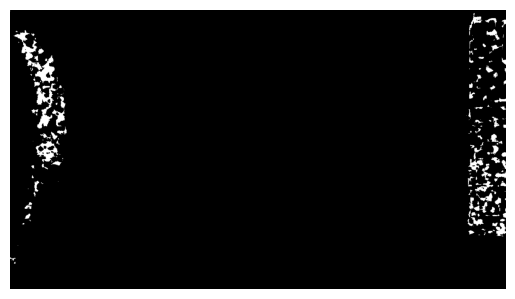

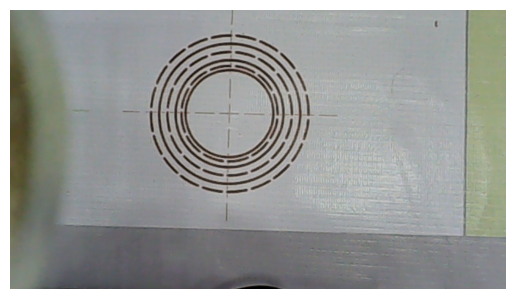

In [27]:

img_show(inRange_hsv)
img_show(dst)

4


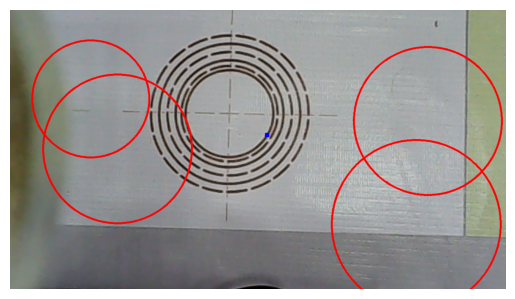

In [28]:
def get_bull(dst,color):
    hsv_img = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)    
    inRange_hsv = cv2.inRange(hsv_img,
                                bull_color_dist[color]["Lower"], 
                                bull_color_dist[color]["Upper"])
    circles = cv2.HoughCircles(inRange_hsv, cv2.HOUGH_GRADIENT, 3, 60,
                            param1=100, param2=75, minRadius=150, maxRadius=250)
    cir_x = []
    cir_y = []
    num = 0
    for circle in circles[0]:
        num += 1
        cir_x.append(circle[0])
        cir_y.append(circle[1])
        cir_dst = cv2.circle(dst, (int(circle[0]), int(circle[1])), int(circle[2]), (0,0,255), 4)

    cir_x = sorted(cir_x)
    cir_y = sorted(cir_y)
    cir_x = cir_x[int(num/4):int(num/4*3)]
    cir_y = cir_y[int(num/4):int(num/4*3)]
    print(num)
    cir_dst = cv2.circle(dst, (int(np.mean(cir_x)), int(np.mean(cir_y))), 1, (255,0,0), 10)
    return cir_dst


img_show(get_bull(dst,"green"))